In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression. Key items include:

Creating random n-dimensional data 
Creating a Model that can handle the data 
Plot a subset of the data along with the prediction
Using a Dataset to read in and choose certain columns to produce a model
Create several models from various combinations of columns
Plot a few of the results
BONUS: Perform all the plots in 3D instead of 2D

# 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data  x1→y,x2→yx1→y,x2→y , etc

In [2]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n) # four dimensions of x
x = np.vstack([x, np.ones(len(x.T))]).T #  .T is for transpose
#takes the x values and condenses the values gives 64 "ones"
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

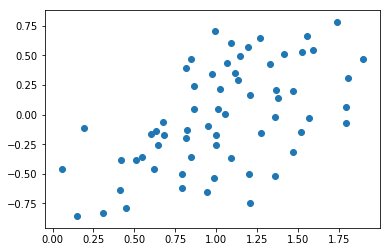

In [3]:
plt.scatter(x.T[0], y) # one dimension

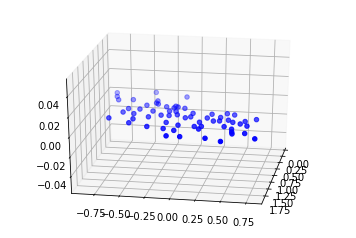

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig_1 = plt.figure()
ax = fig_1.add_subplot(111, projection='3d')
ax.view_init(25, 10)

ax.scatter(x.T[0], y, zdir='z', c='b')

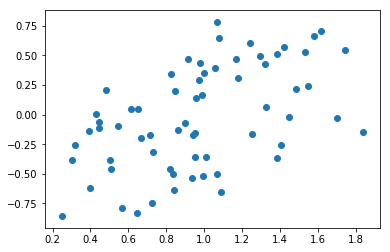

In [5]:
plt.scatter(x.T[1], y) # second dimension

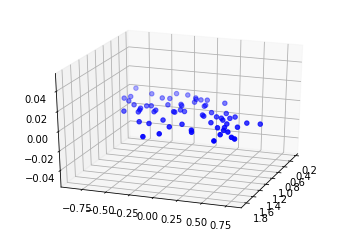

In [6]:
fig_1 = plt.figure()
ax = fig_1.add_subplot(111, projection='3d')
ax.view_init(25, 20)

ax.scatter(x.T[1], y, zdir='z', c='b')

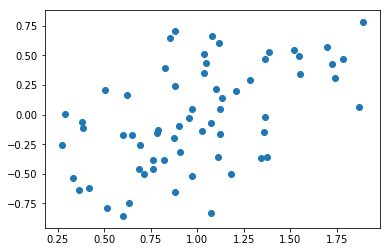

In [7]:
plt.scatter(x.T[2], y) # third dimension

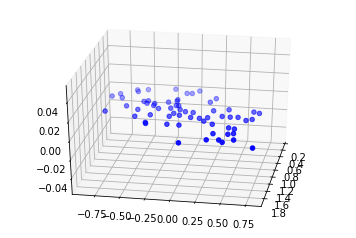

In [8]:
fig_1 = plt.figure()
ax = fig_1.add_subplot(111, projection='3d')
ax.view_init(30, 10)

ax.scatter(x.T[2], y, zdir='z', c='b')

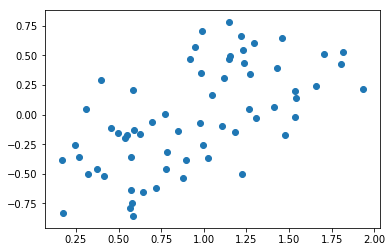

In [9]:
plt.scatter(x.T[3], y) # fourth dimension

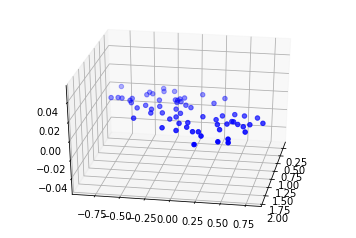

In [10]:
fig_1 = plt.figure()
ax = fig_1.add_subplot(111, projection='3d')
ax.view_init(30, 10)

ax.scatter(x.T[3], y, zdir='z', c='b')

# 2. Create a model to fit the data. Hint: follow the example from Lesson 3


# $\beta = (X^T X)^{-1} Y^T X$

In [11]:
left = np.linalg.inv(np.dot(x.T, x))

In [12]:
left @ np.dot(x.T, x)

array([[  1.00000000e+00,   0.00000000e+00,   8.88178420e-16,
          1.33226763e-15,   0.00000000e+00],
       [ -4.44089210e-16,   1.00000000e+00,   1.77635684e-15,
         -4.44089210e-16,   1.33226763e-15],
       [  0.00000000e+00,   8.88178420e-16,   1.00000000e+00,
          0.00000000e+00,  -4.44089210e-16],
       [ -4.44089210e-16,   0.00000000e+00,  -4.44089210e-16,
          1.00000000e+00,   4.44089210e-16],
       [  1.77635684e-15,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]])

In [13]:
np.dot(x.T, x)

array([[ 79.89026363,  70.15419834,  72.03944284,  68.65897698,
         66.13627729],
       [ 70.15419834,  69.90045032,  67.48655904,  65.20435472,
         62.01379748],
       [ 72.03944284,  67.48655904,  74.03445163,  65.38552081,  63.7719361 ],
       [ 68.65897698,  65.20435472,  65.38552081,  69.84488489,
         60.51323529],
       [ 66.13627729,  62.01379748,  63.7719361 ,  60.51323529,  64.        ]])

In [14]:
right = np.dot(y.T, x)

In [15]:
np.dot(left, right)

array([ 0.22128245,  0.05001623,  0.23555397,  0.35775277, -0.8742893 ])

In [16]:
beta = np.linalg.lstsq(x, y)[0]
beta

array([ 0.22128245,  0.05001623,  0.23555397,  0.35775277, -0.8742893 ])

In [17]:
pred = np.dot(x, beta)

(array([ 1.,  1.,  9.,  7.,  7.,  9.,  9.,  9.,  6.,  6.]),
 array([-0.72082751, -0.59253296, -0.46423841, -0.33594386, -0.20764931,
        -0.07935477,  0.04893978,  0.17723433,  0.30552888,  0.43382343,
         0.56211798]),
 <a list of 10 Patch objects>)

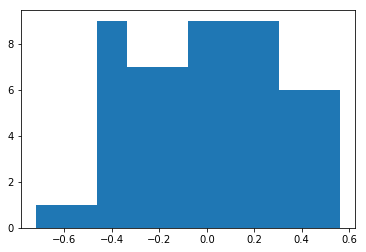

In [18]:
error1 = pred - y
plt.hist(error1)
# This equation checks error residuals for the OLS fit.  

In [19]:
(pred - y).T @ (pred-y)

6.0669793533375653

# 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

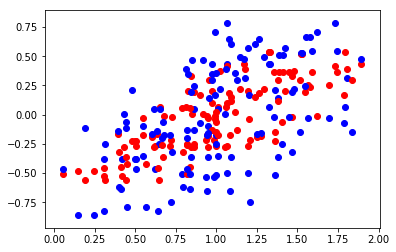

In [20]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')
# plot for x1 and x2 with the pred values

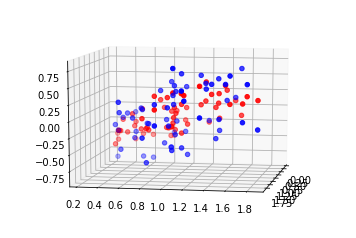

In [21]:
fig_2 = plt.figure()
ax = fig_2.add_subplot(111, projection='3d')
ax.view_init(10, 10)

ax.scatter(x.T[0], x.T[1], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[1], y, zdir='z', c='b')


# 4. Read in mlnn/data/Credit.csv with Pandas and create a model to predict Credit Rating (Rating). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [22]:
import pandas as pd
credit = pd.read_csv('C:\JHU_Python\data\Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [23]:
credit.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [24]:
X_1 = credit[['Income', 'Limit', 'Balance']].as_matrix()
X_1 = np.vstack([X_1.T, np.ones(len(X_1))]).T
# for the x independent variable I chose Income, limit, and balance. I originally had age as a vajriable but I determined that 
# the data was way too dispersed and was a bad predictor.
y_2 = credit['Rating']

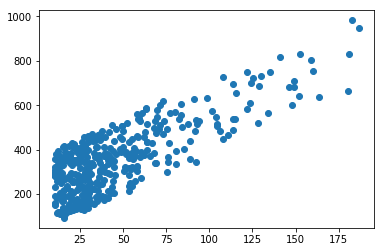

In [25]:
plt.scatter(X_1.T[0], y_2)
# plot of the 'income' variable v. rating. It appears that there is a moderately strong linear association. 

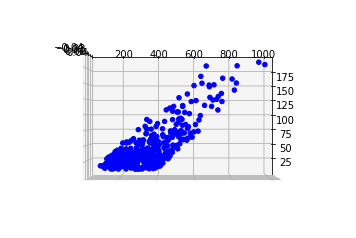

In [26]:
fig_3 = plt.figure()
ax = fig_3.add_subplot(111, projection='3d')
ax.view_init(270,0)

ax.scatter(X_1.T[0], y_2, zdir='z', c='b')

#this is an unusual way off visualizing the data but, you can see that as income in thousands (x-axis on the right) 
#increases so does your credit score (y-axis above).

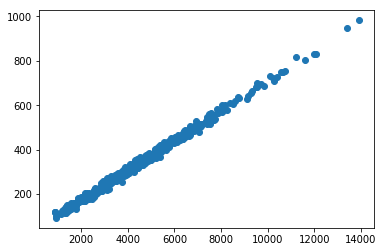

In [27]:
plt.scatter(X_1.T[1], y_2)
# for the second variable I plotted 'limit' v. rating. This is the strongest linear relationship and should be a nice fit for 
# OLS regression 

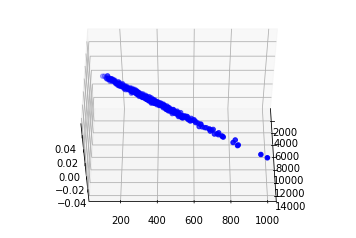

In [28]:
fig_4 = plt.figure()
ax = fig_4.add_subplot(111, projection='3d')
ax.view_init(50,0)

ax.scatter(X_1.T[1], y_2, zdir='z', c='b')

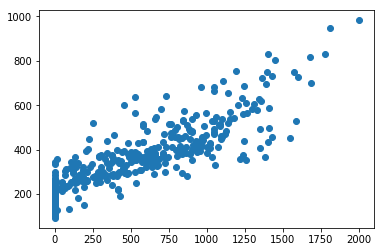

In [29]:
plt.scatter(X_1.T[2], y_2)
# The last plot shows credit balance v. rating. Interestingly it appears that there is somewhat of a linear relationship between 
# the variables. As balance increase along the x-axis so does rating on the y-axis. 

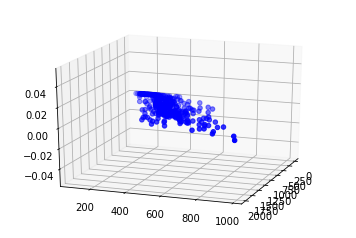

In [30]:
fig_5 = plt.figure()
ax = fig_5.add_subplot(111, projection='3d')
ax.view_init(20,20)

ax.scatter(X_1.T[2], y_2, zdir='z', c='b')

In [31]:
left1 = np.linalg.inv(np.dot(X_1.T, X_1))

In [32]:
left1 @ np.dot(X_1.T, X_1)

array([[  1.00000000e+00,  -2.04636308e-12,  -2.41584530e-13,
         -3.33066907e-16],
       [  1.94289029e-16,   1.00000000e+00,   2.22044605e-15,
          0.00000000e+00],
       [  2.22044605e-16,  -4.26325641e-14,   1.00000000e+00,
         -3.46944695e-18],
       [  1.70530257e-13,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [33]:
right1 = np.dot(y_2.T, X_1)

In [34]:
np.dot(left1, right1)

array([  1.33814959e-01,   6.26724041e-02,   1.47545050e-02,
         4.44250362e+01])

In [35]:
beta1 = np.linalg.lstsq(X_1, y_2)[0]
beta1
# ~ y= 44.42 + 0.13(x1)+0.06(x2)+0.03(x3)+0.014(x4)

array([  1.33814959e-01,   6.26724041e-02,   1.47545050e-02,
         4.44250362e+01])

In [36]:
pred1 = np.dot(X_1, beta1)

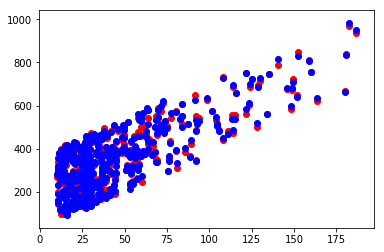

In [37]:
plt.scatter(X_1.T[0], pred1, c='red')
plt.scatter(X_1.T[0], y_2, c='b')
#predicted values vs. income 

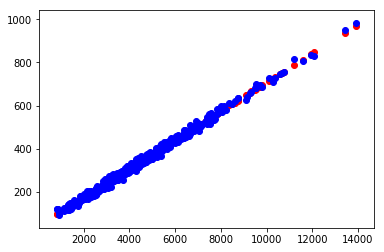

In [38]:
plt.scatter(X_1.T[1], pred1, c='red')
plt.scatter(X_1.T[1], y_2, c='b')
#predicted values vs. credit limit representing a close linear fit.  

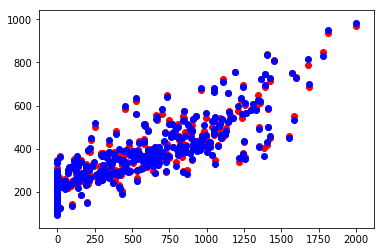

In [39]:
plt.scatter(X_1.T[2], pred1, c='red')
plt.scatter(X_1.T[2], y_2, c='b')
#predicted values vs. balance.  

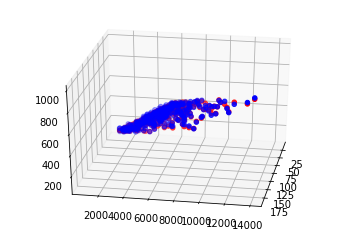

In [40]:
fig_7 = plt.figure()
ax = fig_7.add_subplot(111, projection='3d')
ax.view_init(30, 10)

ax.scatter(X_1.T[0], X_1.T[1], pred1, zdir='z', c='r')
ax.scatter(X_1.T[0], X_1.T[1], y_2, zdir='z', c='b')

#I excluded balance vs. credit rating from the plot because the scaling was 
# distorted compared to the two other independent variables.

(array([ 20.,  41.,  43.,  61.,  92.,  74.,  46.,  17.,   5.,   1.]),
 array([-27.0767156 , -20.66861489, -14.26051419,  -7.85241349,
         -1.44431279,   4.96378791,  11.37188861,  17.77998931,
         24.18809001,  30.59619071,  37.00429141]),
 <a list of 10 Patch objects>)

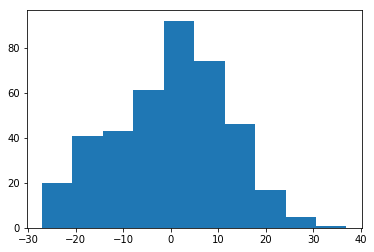

In [41]:
error2= pred1 - y_2
plt.hist(error2)

In [42]:
pred1 - y_2

0      -5.672386
1       5.394210
2      -3.613984
3      -6.784834
4       6.693388
5       7.461590
6       3.563885
7       0.697906
8      -8.615572
9      10.215766
10     -6.660417
11     -9.398196
12     -3.112297
13    -10.961658
14    -13.574662
15      5.361065
16     -1.637441
17     -9.881810
18     16.305135
19      1.785906
20     -7.650212
21      5.429711
22     -0.993787
23    -14.362711
24     -0.022110
25      1.143565
26     -2.054798
27      6.860264
28    -12.222015
29      2.168248
         ...    
370   -17.678145
371    11.405011
372     3.492980
373    19.186811
374    -7.630719
375     4.526724
376     1.640397
377     4.398782
378     1.257550
379    16.801520
380    17.920799
381    -0.230900
382     3.079810
383   -24.836809
384   -15.689493
385    16.782937
386    -3.702239
387     5.683316
388    12.016018
389     9.524734
390    -0.992439
391     3.692892
392    -3.451345
393    -7.590165
394    12.785727
395     4.263041
396    -2.167812
397    -5.3881

ValueError: shape mismatch: objects cannot be broadcast to a single shape

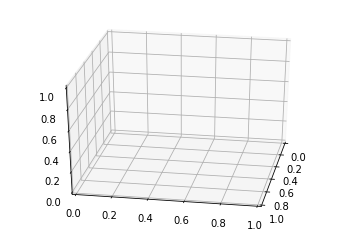